In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-22 to 2019-07-05 - 77


In [3]:
stats = quote.statistics()
stats = stats[(stats['mean'] > 0.4) & (stats['shrp'] > 0.4)]
print(len(stats))
stats

58


,len,mean,std,shrp,drawdown
Symbols,,,,,
LMBS,32,0.610067,0.106943,4.146149,0.135474
MBB,32,1.058892,0.249363,3.578024,0.325100
BLV,32,3.665045,0.992659,3.524248,1.030194
VMBS,32,0.942136,0.221027,3.508473,0.264901
BND,32,1.642675,0.438699,3.364515,0.468862
BNDX,32,1.611400,0.430171,3.358506,0.193599
AGG,32,1.636650,0.441674,3.328209,0.421299
SCHZ,32,1.620556,0.438509,3.315532,0.414549
BIV,32,2.037322,0.595629,3.140641,0.576701


evicted VMBS 0.9444911886506105
evicted SUB 0.8524854022833563
evicted MBB 0.9410728647371782
evicted BLV 0.9220636788145304
evicted SCHP 0.9209051371857182
evicted VTIP 0.8994802612342677
evicted VGSH 0.9008153493351865
evicted BSCK 0.9457696901597192
evicted SHM 0.9177799341335904
evicted SCHZ 0.9174107950870432
evicted VCIT 0.9364513004371654
evicted SPSB 0.9176392943248504
evicted HYLB 0.9443924316035864
evicted BWX 0.8882875447167824
evicted IBDL 0.7920274672867034
evicted LMBS 0.7560530280446871
evicted TLT 0.5535945765630573
retry backlogs ['JNK', 'IPE', 'TIP', 'SPTL', 'TDTT', 'ISTB', 'VCSH', 'VGIT', 'LQD', 'IEI', 'STIP', 'BSV', 'BND', 'SHY', 'HYLS', 'SPTS', 'SCHO', 'IGIB', 'SPIB', 'IGSB', 'BIV', 'MUB', 'AGG', 'IEF', 'USIG', 'SCHR', 'GOVT', 'HYG', 'SLQD', 'ITM', 'TFI', 'VTEB', 'VWOB', 'PZA', 'VCLT', 'EMLC'] at 0.96
evicted STIP 0.91369340546107
evicted TIP 0.9279402072476806
evicted SPTS 0.9272095343498676
evicted GOVT 0.9560235052733272
evicted AGG 0.9123698558492351
evicted SP

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,1.176814,0.121704,0.920939,1.090625,1.169241,1.239662,1.508715,8.300027,0.207082
BNDX,32.0,1.611400,0.430171,0.791908,1.400778,1.697197,1.792946,2.403138,3.358506,0.193599
HYD,32.0,1.000514,0.359385,0.404536,0.732169,0.872761,1.386714,1.749346,2.320204,0.409065
CMF,32.0,0.969432,0.375420,0.319411,0.676627,0.882184,1.274252,1.694679,2.138314,0.181783
NUV,32.0,1.633826,0.697934,0.207926,1.303932,1.473109,2.136476,3.134725,2.102146,0.982322
EMB,32.0,2.292128,1.448554,0.191041,0.617247,2.531490,3.553788,4.414960,1.467299,1.290153
HYG,32.0,0.806702,1.484754,-1.610858,-0.615547,0.936818,1.999537,3.245076,0.431072,1.974375


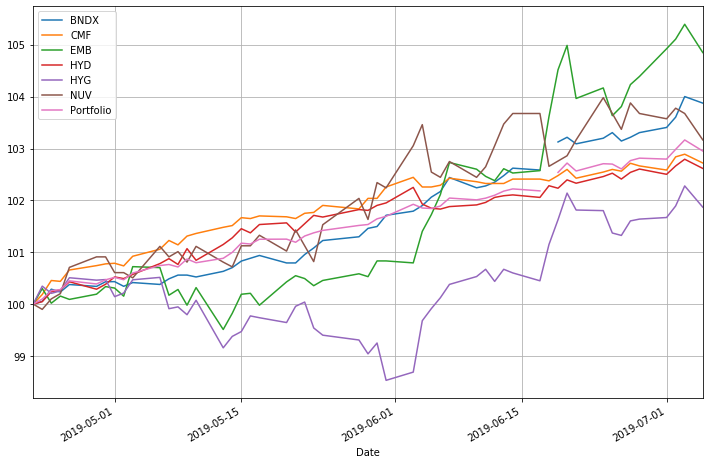

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)